# **Modelos simples usando Keras**

## Passos:

1. **Carregando os Dados**:
  
   

2. **Criando o Modelo com Keras**:
   

3. **Compilando o Modelo**:


4. **Treinando o Modelo**:
   

5. **Avaliando o Modelo**:
   
6. **Plotando os gráficos**   


# Primeira seção do código
* a primeira seção é sempre a chamada das bibliotecas necessárias

* neste exemplo estamos chamando o numpy (biblioteca matemática), sempre ao chamr uma biblioteca temos que nomear um apelido para ela.  (conhecido como alias).
* Dentro deste biblioteca temos a função loadtxt


In [6]:
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split  # divide a base em treinamento e teste
from keras.layers import Dense, Input
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

A função **`numpy.loadtxt()`** é usada para carregar dados de um arquivo de texto em Python. Ela é especialmente útil para ler arquivos de texto simples de forma rápida. Vamos entender os parâmetros e o que cada um faz:

1. **`fname`** (nome do arquivo):
   - Representa o arquivo que queremos carregar.
   - Pode ser um caminho de arquivo, uma string com o nome do arquivo ou uma lista de nomes de arquivos.
   - Se a extensão do arquivo for `.gz` ou `.bz2`, o arquivo será descompactado automaticamente.

2. **`dtype`** (tipo de dados):
   - Define o tipo de dados do array resultante.
   - O padrão é `float`, mas você pode especificar outros tipos, como `int` ou `str`.

3. **`comments`** (comentários):
   - Define os caracteres que indicam o início de um comentário no arquivo.
   - O padrão é `#`, mas você pode personalizá-lo.

4. **`delimiter`** (delimitador):
   - Especifica o caractere usado para separar os valores no arquivo.
   - O padrão é espaço em branco, mas você pode definir outro caractere.

5. **`converters`** (conversores):
   - Permite personalizar a conversão dos valores lidos.
   - Pode ser um dicionário que mapeia o número da coluna para uma função de conversão.

6. **`skiprows`** (pular linhas):
   - Define quantas linhas devem ser ignoradas no início do arquivo (incluindo comentários).

7. **`usecols`** (colunas a serem lidas):
   - Especifica quais colunas do arquivo devem ser lidas.
   - Pode ser um único número ou uma sequência de números.

8. **`unpack`** (desempacotar):
   - Se `True`, o array resultante é transposto, permitindo desempacotar os valores em variáveis separadas.

9. **`ndmin`** (número mínimo de dimensões):
   - Define o número mínimo de dimensões do array resultante.
   - Pode ser 0, 1 ou 2.

10. **`encoding`** (codificação):
    - Define a codificação usada para decodificar o arquivo de entrada.
    - O valor especial `'bytes'` garante que você receba arrays de bytes como resultados, se possível.




In [2]:
# Carregue a base de dados Pima Indians Diabetes online
# aqui estamos apenas usando o parametro delimiter = ,
dataset = loadtxt('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', delimiter=',')

In [3]:
# Separe os dados entre entradas (X) e saídas (y)
# usando uma expressão para buscar
X = dataset[:, 0:8]
y = dataset[:, 8]

**X = dataset[:, 0:8]:**

* **X** é uma variável que estamos criando para armazenar parte dos dados do conjunto de dados.
dataset é o conjunto de dados carregado anteriormente.
* **Os dois pontos** : indicam que queremos selecionar todas as linhas do conjunto de dados.
* **O 0:8** especifica que queremos selecionar as colunas da 0ª à 7ª (pois a contagem começa em 0).
    
    Portanto, X conterá todas as linhas e as primeiras 8 colunas do conjunto de dados.

**y = dataset[:, 8]:**
* **y** é outra variável que estamos criando para armazenar outra parte dos dados do conjunto de dados. Novamente, dataset é o conjunto de dados.
    O : indica que queremos selecionar todas as linhas.
    O 8 especifica que queremos selecionar apenas a 8ª coluna.

    Portanto, y conterá todas as linhas da 8ª coluna do conjunto de dados.
Em resumo:

**X** contém as primeiras 8 colunas do conjunto de dados (todas as linhas).
**y** contém apenas a 8ª coluna do conjunto de dados (todas as linhas).
Esses comandos são frequentemente usados para separar as entradas (características) e as saídas (rótulos) ao treinar modelos de machine learning.



## **IMPORTANTE**
### Observe que por default, a letra X é sempre em maíuscula e a letra y é sempre em minúscula

# dividindo a base e treino e teste


1. **`test_size=0.2`**:
    - Esse parâmetro define a proporção dos dados que serão usados como conjunto de teste.
    - No exemplo dado, `test_size=0.2` significa que **20%** dos dados serão reservados para teste, enquanto os outros **80%** serão usados para treinamento.
    - Essa divisão é importante para avaliar o desempenho do modelo em dados não vistos durante o treinamento.

2. **`random_state=42`**:
    - O `random_state` é uma semente (seed) usada para inicializar o gerador de números aleatórios.
    - Quando definido com um valor específico (como `42` no exemplo), garante que a divisão dos dados em treinamento e teste seja **reprodutível**.
    - Isso significa que, se você executar o código várias vezes com o mesmo valor de `random_state`, obterá a mesma divisão de dados toda vez.
    - Escolher um valor específico (como `42`) ajuda a garantir consistência nos resultados e facilita a depuração.


3. **`shuffle`**

   * **shuffle=True** (padrão): O embaralhamento dos dados ocorre **antes** de dividir os dados em treino e teste. Isso garante que a distribuição dos dados seja aleatória, o que é importante quando os dados podem ter algum padrão sequencial (como dados de séries temporais ou dados agrupados).

  * **shuffle=False**: Não embaralha os dados, dividindo-os na ordem em que estão organizados originalmente. Isso pode ser útil em cenários específicos, como em dados temporais onde a ordem dos dados é importante.
  


O parâmetro `shuffle` na função `train_test_split` do `scikit-learn` determina se os dados devem ser embaralhados **antes** de serem divididos em conjuntos de treino e teste. Ele é útil para garantir que os dados sejam distribuídos de maneira aleatória entre os dois conjuntos, evitando que os dados estejam organizados de forma sequencial ou agrupada (o que pode levar a um particionamento enviesado).

### Exemplo de uso:

Suponha que você tenha um dataset onde os exemplos de uma classe (por exemplo, "positivo") aparecem primeiro, seguidos por exemplos da outra classe (por exemplo, "negativo"). Se você não embaralhar os dados (`shuffle=False`), a divisão pode resultar em todos os exemplos positivos no conjunto de treinamento e todos os exemplos negativos no conjunto de teste, o que geraria um modelo enviesado.

Com `shuffle=True`, você garante que os exemplos positivos e negativos sejam distribuídos aleatoriamente entre os conjuntos de treino e teste, melhorando a generalização do modelo.

### Exemplo completo:

```python
from sklearn.model_selection import train_test_split

# Exemplo de dados
X = ["Eu adoro programar", "Este produto é horrível", "Estou aprendendo muito", "O atendimento foi ótimo", "Não gostei da comida"]
y = ["positivo", "negativo", "positivo", "positivo", "negativo"]

# Dividindo os dados com shuffle ativado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

print("Treinamento:", X_train, y_train)
print("Teste:", X_test, y_test)
```

### O que faz o `random_state`:
- O `random_state` define a semente de geração aleatória, garantindo que a divisão seja reproduzível. Isso significa que, se você executar o código várias vezes com o mesmo `random_state`, obterá as mesmas divisões de treino e teste.

### Resumo:
- **shuffle=True** (padrão): embaralha os dados **antes** de fazer a divisão em treino e teste.
- **random_state**: garante a reprodutibilidade do embaralhamento e da divisão.

Se você quiser mais exemplos ou tiver outra dúvida, me avise!



In [4]:
# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)

# Mostrando uma rede simples shallow net com 2 camadas oculta


1. **Inicialização do Modelo Sequencial**:
   - **`model = Sequential()`**
   - Aqui, estamos criando um objeto chamado `model` que representa nosso modelo de rede neural.
   - O modelo sequencial é uma pilha linear de camadas, onde as saídas de uma camada são as entradas da próxima.
   - É o tipo mais simples de modelo em Keras.

2. **Adição da primeira camada**

   * **```model.add(Input(shape=(8,)))```**
   * Para criar um modelo no Keras usando a base de dados Pima Indian Diabetes, você deve definir a camada de entrada com um número de neurônios igual ao número de características (features) no seu conjunto de dados. A base de dados Pima Indian Diabetes possui 8 características

2. **Adição da Segunda Camada**:
   - **`model.add(Dense(12, activation='relu'))`**
   - Estamos adicionando uma camada densa (totalmente conectada) ao modelo.
   - A camada tem 12 neurônios (ou unidades).
   - A função de ativação usada é a ReLU (Rectified Linear Unit).
   - A ReLU é uma função não linear que introduz não-linearidade no modelo.

3. **Adição da Terceira Camada**:
   - **`model.add(Dense(8, activation='relu'))`**
   - Aqui, adicionamos outra camada densa com 8 neurônios.
   - Novamente, usamos a função de ativação ReLU.

4. **Camada de Saída**:
   - **`model.add(Dense(1, activation='sigmoid'))`**
   - Esta é a camada de saída do modelo.
   - Tem apenas 1 neurônio, pois estamos fazendo uma classificação binária (sim/não, 0/1).
   - A função de ativação usada é a sigmoid.
   - A sigmoid mapeia os valores para o intervalo [0, 1], tornando-a adequada para problemas de classificação binária.

In [7]:
# Inicialize o modelo sequencial
model = Sequential()

# camada de entrada
model.add(Input(shape=(8,)))

# Adicione uma camada com 12 neurônios e função de ativação ReLU
model.add(Dense(12, activation='relu'))

# Adicione outra camada com 8 neurônios e função de ativação ReLU
model.add(Dense(8, activation='relu'))

# Camada de saída com função de ativação sigmoid (para classificação binária)
model.add(Dense(1, activation='sigmoid'))

1. `model.fit(X_train, y_train, epochs=100, batch_size=10)`:
    - `model`: Refere-se a um objeto que representa o modelo de aprendizado de máquina.
    - `.fit(X_train, y_train, epochs=50, batch_size=10)`: É um método usado para treinar o modelo com dados de entrada (X) e saídas (y).
        - `X_train`: Representa as **entradas** (características) do modelo.
        - `y_train`: Representa as **saídas** (rótulos) correspondentes.
        - `epochs=100`: Especifica o número de **épocas** (iterações completas sobre o conjunto de dados) para treinar o modelo. Neste caso, são 100 épocas.
        - `batch_size=10`: Define o tamanho do **lote** (quantidade de amostras) usado em cada atualização dos pesos do modelo durante o treinamento.

Esse código ajusta os parâmetros do modelo com base nos dados de entrada e saída fornecidos, usando 100 épocas e lotes de tamanho 10. O objetivo é otimizar o modelo para fazer previsões mais precisas

# Compilando o modelo


1. `model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])`:
    - `model`: Refere-se ao modelo de aprendizado de máquina que foi definido anteriormente.
    - `.compile(...)`: É um método usado para configurar o modelo antes do treinamento.
    - `loss='binary_crossentropy'`: Define a função de perda (loss) que o modelo usará durante o treinamento. Neste caso, estamos usando a **entropia cruzada binária**, que é comumente usada para problemas de classificação binária.
    - `optimizer='adam'`: Especifica o otimizador que será usado para ajustar os pesos do modelo durante o treinamento. O **Adam** é um otimizador popular que se adapta automaticamente à taxa de aprendizado.
    - `metrics=['accuracy']`: Define as métricas que serão avaliadas durante o treinamento e teste do modelo. Aqui, estamos usando a métrica de **acurácia**, que mede a proporção de previsões corretas em relação ao total de previsões.

Esse código configura o modelo para usar a função de perda de entropia cruzada binária, o otimizador Adam e avaliar a acurácia durante o treinamento. Isso prepara o modelo para ser treinado e avaliado com base nos dados fornecidos.

In [8]:
# Compile o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo




In [9]:
# Treine o modelo com os dados de entrada (X) e saídas (y)

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test))



Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3880 - loss: 15.8091 - val_accuracy: 0.6429 - val_loss: 2.3487
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6706 - loss: 1.6520 - val_accuracy: 0.6494 - val_loss: 1.3511
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5916 - loss: 1.4981 - val_accuracy: 0.6688 - val_loss: 0.9874
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6205 - loss: 1.1841 - val_accuracy: 0.6818 - val_loss: 0.9030
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7021 - loss: 1.0345 - val_accuracy: 0.6753 - val_loss: 0.8646
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6462 - loss: 0.9988 - val_accuracy: 0.7013 - val_loss: 0.8955
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.9677 - val_accuracy: 0.6494 - val_loss: 0.8144
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6191 - loss: 1.0327 - val_accuracy: 0.7078 - val_loss

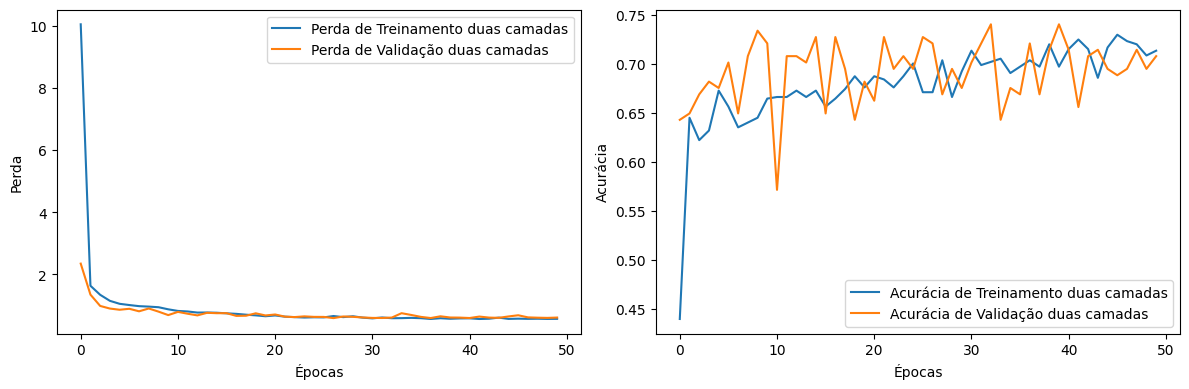

In [10]:
import matplotlib.pyplot as plt
# Plotando gráficos de perda e acurácia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Perda de Treinamento duas camadas")
plt.plot(history.history["val_loss"], label="Perda de Validação duas camadas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Acurácia de Treinamento duas camadas")
plt.plot(history.history["val_accuracy"], label="Acurácia de Validação duas camadas")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

plt.tight_layout()

# Salvar a figura em um arquivo (por exemplo, 'graficos.png')
# mas é preciso fazer o download da figura, caso saia do notebook ela se perderá.

plt.savefig('graficos.png', format='png')

# Exibir os gráficos na tela
plt.show()

# Avaliando o Modelo

1. `model.evaluate(X_test, y_test)`:
    - `model`: Refere-se ao modelo de aprendizado de máquina que foi treinado previamente.
    - `.evaluate(X_test, y_test)`: É um método usado para avaliar o desempenho do modelo com dados de teste.
        - `X_test`: Representa as **entradas de teste** (características) do modelo.
        - `y_test`: Representa as **saídas de teste** (rótulos verdadeiros) correspondentes.
    - O resultado dessa avaliação é uma tupla contendo a **perda** (loss) e a **acurácia** (accuracy) do modelo.

2. `print(f"Acurácia: {accuracy*100:.2f}%")`:
    - Aqui, estamos formatando e imprimindo a acurácia do modelo em porcentagem.
    - `{accuracy*100:.2f}` calcula a acurácia multiplicada por 100 e formata o resultado com duas casas decimais após o ponto decimal.
    - O resultado final será algo como "Acurácia: 92.50%".

Esse trecho de código avalia o desempenho do modelo usando os dados de teste e exibe a acurácia obtida. A acurácia é uma medida importante para entender o quão bem o modelo está se saindo na tarefa para a qual foi treinado.

In [11]:
# Avalie o modelo com dados de teste
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia: {accuracy*100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6912 - loss: 0.6072 
Acurácia: 70.78%


# Rede simples com apenas uma camada oculta

In [ ]:
# Carregando os dados
import pandas as pd
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
data = pd.read_csv(url, names=column_names)

# Separando as features (X) e o rótulo (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Dividindo os dados em treinamento e teste
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(8,  activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compilando o modelo
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Treinando o modelo
history1 = model.fit(X_train1, y_train1, epochs=100, batch_size=10, validation_data=(X_test1, y_test1))

# Plotando gráficos de perda e acurácia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Perda de Treinamento com uma camada")
plt.plot(history.history["val_loss"], label="Perda de Validação com uma camada")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Acurácia de Treinamento")
plt.plot(history.history["val_accuracy"], label="Acurácia de Validação")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

plt.tight_layout()

# Salvar a figura em um arquivo (por exemplo, 'graficos.png')
# mas é preciso fazer o download da figura, caso saia do notebook ela se perderá.

plt.savefig('graficos1.png', format='png')

# Exibir os gráficos na tela
plt.show()


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3496 - loss: 129.5509 - val_accuracy: 0.3571 - val_loss: 94.5452
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3520 - loss: 87.0769 - val_accuracy: 0.3571 - val_loss: 55.5317
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3305 - loss: 48.4474 - val_accuracy: 0.3831 - val_loss: 12.1565
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4814 - loss: 8.2476 - val_accuracy: 0.6623 - val_loss: 3.4622
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5815 - loss: 4.0171 - val_accuracy: 0.6299 - val_loss: 3.0571
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5965 - loss: 3.6162 - val_accuracy: 0.6039 - val_loss: 2.8451
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6228 - loss: 2.8753 - val_accuracy: 0.6039 - val_loss: 2.6490
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5943 - loss: 2.7651 - val_accuracy: 0.6

In [ ]:
# Avalie o modelo com dados de teste
loss, accuracy = model.evaluate(X_test1, y_test1)
print(f"Acurácia: {accuracy*100:.2f}%")